In [1]:
# import numpy as np
# import pandas as pd
# import json
# import matplotlib.pyplot as plt
# from datetime import datetime, timedelta



# from models.ActivityTimeSeries import ActivityTimeSeries
# from models.CGMData import CGMData
# from models.HRTimeSeries import HRTimeSeries
# from models.ActivityDistance import ActivityDistance
# from models.ActivitySummary import ActivitySummary
# from models.ActivityLog import ActivityLog
# from models.BodyMetrics import BodyMetrics
# from models.HRSummary import HRSummary
# from models.HRZone import HRZone
# from models.Age_Sex_YearsOnInsulin_AgeOnSet_Diagnosis import Age_Sex_YearsOnInsulin_AgeOnSet_Diagnosis

# from utils.TS_DataFrame_Two_Columns import TS_DataFrame_Two_Columns

# from utils.utils import matlabdt_converter, single_element_array, dateformat_tostring


def create_time_intervals(listCdtDate, listC ):    
    listTime = []
    listMean = []
    listTemp = []
    
    p = 0
    l=0
    for i in range(0, len(listCdtDate)):
        if(listCdtDate[i].minute == p):
            listTime.append(listCdtDate[i])
            listMean.append(np.mean(listTemp))
            listTemp = []
            p = p+30
            if(p ==60):
                p=0

        else:
            listTemp.append(listC[i])
    return listTime, listMean

def create_time_intervals_cal(listCdtDate, listC ):    
    listTime = []
    listMean = []
    listTemp = []
    
    p = 30
    l=0
    for i in range(0, len(listCdtDate)):
        if(listCdtDate[i].minute == p):
            listTime.append(listCdtDate[i])
            listMean.append(np.mean(listTemp))
            listTemp = []
            p = p+30
            if(p ==60):
                p=0

        else:
            listTemp.append(listC[i])
    return listTime, listMean

In [2]:
# def create_time_intervals(listCdtDate, listC ):    
#     listTime = []
#     listMean = []
#     listTemp = []
    
#     p = 0
#     l=0
#     for i in range(0, len(listCdtDate)):
#         if(listCdtDate[i].minute == p):
#             listTime.append(listCdtDate[i])
#             listMean.append(np.mean(listTemp))
#             listTemp = []
#             p = p+15
#             if(p ==60):
#                 p=0

#         else:
#             listTemp.append(listC[i])
#     return listTime, listMean

# def create_time_intervals_cal(listCdtDate, listC ):    
#     listTime = []
#     listMean = []
#     listTemp = []
    
#     p = 15
#     l=0
#     for i in range(0, len(listCdtDate)):
#         if(listCdtDate[i].minute == p):
#             listTime.append(listCdtDate[i])
#             listMean.append(np.mean(listTemp))
#             listTemp = []
#             p = p+15
#             if(p ==60):
#                 p=0

#         else:
#             listTemp.append(listC[i])
#     return listTime, listMean

In [3]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
from datetime import datetime, timedelta


filename = "../data/131.txt"
#getting all the data
with open(filename) as json_file:
    data = json.load(json_file)
    
    d = data['ActivityTimeSeries']
    m1 = d['CaloriesOut']
    m2 = d['CaloriesOutdt']
    
    steps = d['Steps']
    stepsdt = d['Stepsdt']
    
    
    p = data['CGMData']
    n1 = p['SG']
    n2 = p['SGdt']

    listC = []
    listCdtDate = []
    listCdt = []


    
    listSg =[]
    listSgdt =[]

        
    listSteps = []
    listStepsDt = []
    
    ts = []
    
  
    for i in range(0,len(m1)):
        listC.append(*m1[i])
        listCdtDate.append(datetime.fromordinal(int((float)(*m2[i]))) + timedelta(days=((float)(*m2[i]))%1) - timedelta(days = 366))
    for i in range(0,len(n2)):
        listSg.append(*n1[i])
        listSgdt.append(datetime.fromordinal(int((float)(*n2[i]))) + timedelta(days=((float)(*n2[i]))%1) - timedelta(days = 366))

    for i in range(0,len(steps)):
        listSteps.append(*steps[i])
        listStepsDt.append(datetime.fromordinal(int((float)(*stepsdt[i]))) + timedelta(days=((float)(*stepsdt[i]))%1) - timedelta(days = 366))

        
    dfC = pd.DataFrame()
    dfS = pd.DataFrame()
    dfT = pd.DataFrame()
    dfSteps = pd.DataFrame()
    
    steps_dt = pd.DataFrame()
    
    sg_df = pd.DataFrame()
    
    dfC['CaloriesOut'] = listC
    dfC['CaloriesOutDate'] = listCdtDate
    
    
    dfS['SG'] = listSg
    dfS['SGdt'] = listSgdt
    
    dfSteps['Stepsdt'] = listSteps
    dfSteps['Steps'] = listStepsDt

    listTime, listMean = create_time_intervals_cal(listCdtDate, listC )
    sgTime, sgValues = create_time_intervals(listSgdt, listSg )
    list_steps_Time, list_steps = create_time_intervals_cal(listStepsDt, listSteps)
    
    dfT['CaloriesOut-Time'] = listTime
    dfT['CaloriesOut-Mean'] = listMean
    
    
    sg_df['SG-Time'] = sgTime
    sg_df['SG-Mean'] = sgValues
    
#     steps_df['Steps-Mean'] = list_steps
#     steps_df['Steps-Time'] = list_steps_Time

#     steps_df['Steps'] = list_steps
#     steps_df['Steps-Time'] = list_steps_dt

    

#     print(dfT.where(dfT['CaloriesOut-Time'] <  '2018-7-1') )
    
    
#     for item in listTime:
#         if item.month == 5 and item.day == 15:
#             print(item)
    
    
#     dfT['Time'] = listTime
#     dfT['Average'] = listMean
#     print(dfT)
   
#     print(dfT)
#     for item in dfT:
#         print(item[i])


In [4]:
# len(sgTime)

## splitting dataframe of CalOut and Cal-dt and splitting  b/c it repeats data of month 6, day 16 patient 131.txt

In [5]:

#  finding same time for start and e
# cal_new_time = []
# for item in dfT['CaloriesOut-Time']:
#     if item.month == 6 and item.day == 16:
#         print(item)

# cal_half_array = []
# for item in cal_new_time[:48]:
#     cal_half_array.append(item)
#     print(item)
#     newtime_calories(cal_same_time)

cal_split_df = pd.DataFrame()

list_of_cal_dates = []
list_of_cal_averages = []
for index, row in dfT.iterrows():
    if row['CaloriesOut-Time'].month == 6 and row['CaloriesOut-Time'].day == 16:
#         print(row['CaloriesOut-Time'])
        list_of_cal_dates.append(row['CaloriesOut-Time'])
        list_of_cal_averages.append(row['CaloriesOut-Mean'])
        
cal_split_df['CaloriesOut-Mean'] =list_of_cal_averages
cal_split_df['CaloriesOut-Time'] = list_of_cal_dates

In [6]:
steps_split_df = pd.DataFrame()

list_of_cal_dates = []
list_of_cal_averages = []
for index, row in dfT.iterrows():
    if row['CaloriesOut-Time'].month == 6 and row['CaloriesOut-Time'].day == 16:
#         print(row['CaloriesOut-Time'])
        list_of_cal_dates.append(row['CaloriesOut-Time'])
        list_of_cal_averages.append(row['CaloriesOut-Mean'])
        
cal_split_df['CaloriesOut-Mean'] =list_of_cal_averages
cal_split_df['CaloriesOut-Time'] = list_of_cal_dates

In [131]:
# print(len(cal_split_df))
# cal_split_df[:30]

In [13]:
first_half_df = pd.DataFrame()
length = len(cal_split_df)
length = int(length/2)
print(length)
if cal_split_df.shape[0] > 10:
    first_half_df = cal_split_df[:length]


48


In [14]:
print(len(first_half_df))
first_half_df


48


,CaloriesOut-Mean,CaloriesOut-Time
0,1.321250,2017-06-16 00:00:00.000000
1,1.329696,2017-06-16 00:30:57.600003
2,1.321573,2017-06-16 01:00:02.879995
3,1.325774,2017-06-16 01:30:00.000000
4,1.312200,2017-06-16 02:00:57.600003
5,1.316886,2017-06-16 02:30:02.879995
6,1.316725,2017-06-16 03:00:00.000000
7,1.382184,2017-06-16 03:30:57.600003
8,1.330946,2017-06-16 04:00:02.879995
9,1.321250,2017-06-16 04:30:00.000000


## splitting Sg and SGdt dataframe of month 6, day 16 patient 131.txt

In [15]:
sg_split_df = pd.DataFrame()

list_of_sg_dates = []
list_of_sg_averages = []
for index, row in sg_df.iterrows():
    if row['SG-Time'].month == 6 and row['SG-Time'].day == 16:
#         print(row['CaloriesOut-Time'])Time
        list_of_sg_dates.append(row['SG-Time'])
        list_of_sg_averages.append(row['SG-Mean'])
        
sg_split_df['SG-Mean'] =list_of_sg_averages
sg_split_df['SG-Time'] = list_of_sg_dates

In [16]:
print(len(sg_split_df))
sg_split_df

16


,SG-Mean,SG-Time
0,202.058824,2017-06-16 00:00:00
1,177.529412,2017-06-16 01:30:00
2,193.000000,2017-06-16 03:00:00
3,197.470588,2017-06-16 04:30:00
4,189.117647,2017-06-16 06:00:00
5,184.058824,2017-06-16 07:30:00
6,141.764706,2017-06-16 09:00:00
7,92.176471,2017-06-16 10:30:00
8,123.529412,2017-06-16 12:00:00
9,117.470588,2017-06-16 13:30:00


In [49]:
print('48 rows in calories-df and 3 rows is every hour and a half')
print('16 rows in Sg and each row is 1 hour and a half')
print('48/16 = 3')


48 rows in calories-df and 3 rows is every hour and a half
16 rows in Sg and each row is 1 hour and a half
48/16 = 3


# converting length by using means of each 3 rows

In [50]:
from pandas import *
final_CalOut_df = pd.DataFrame()
final_CalOut_df['CaloriesOut-Mean'] = first_half_df.groupby(qcut(first_half_df.index,16 )).mean()
print('length of calories-out-df')
print(len(final_CalOut_df))



length of calories-out-df
16


/home/cowboyuniverse/anaconda3/lib/python3.6/site-packages/pandas/core/indexes/category.py:138: RuntimeWarning: Values and categories have different dtypes. Did you mean to use
'Categorical.from_codes(codes, categories)'?
  data = Categorical(data, categories=categories, ordered=ordered)
/home/cowboyuniverse/anaconda3/lib/python3.6/site-packages/pandas/core/indexes/category.py:138: RuntimeWarning: None of the categories were found in values. Did you mean to use
'Categorical.from_codes(codes, categories)'?
  data = Categorical(data, categories=categories, ordered=ordered)


In [146]:
# putting SG, CalOut into dataframe 

In [59]:
calout_sg_df = pd.DataFrame()
cal_sg_list = []
for item in final_CalOut_df['CaloriesOut-Mean']:
    cal_sg_list.append(item)

calout_sg_df['CaloriesOut-Mean'] = cal_sg_list

calout_sg_df['SG-Mean'] = sg_split_df['SG-Mean']
# calout_sg_df['Time'] = sg_split_df['SG-Time']

calout_sg_df

,CaloriesOut-Mean,SG-Mean
0,1.324173,202.058824
1,1.324173,177.529412
2,1.324173,193.000000
3,1.318287,197.470588
4,1.318287,189.117647
5,1.318287,184.058824
6,1.343285,141.764706
7,1.343285,92.176471
8,1.343285,123.529412
9,1.872902,117.470588


In [72]:
import matplotlib.pyplot as plt
from sklearn import preprocessing

calout_sg_df
# index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
# calout_sg_df_norm['index'] 

X_scaled = preprocessing.scale(calout_sg_df)
scaler = preprocessing.StandardScaler().fit(calout_sg_df)

# # 
print(calout_sg_df_norm)


scaler

[[-0.85068121  1.45688338]
 [-0.85068121  0.86597658]
 [-0.85068121  1.23865881]
 [-0.87281108  1.34635405]
 [-0.87281108  1.14513399]
 [-0.87281108  1.02326832]
 [-0.77882333  0.00441463]
 [-0.77882333 -1.19015235]
 [-0.77882333 -0.4348686 ]
 [ 1.21244476 -0.58082399]
 [ 1.21244476 -0.89540747]
 [ 1.21244476 -0.7338646 ]
 [ 0.60564962 -0.26602251]
 [ 0.60564962 -1.03002652]
 [ 0.60564962 -1.71870927]
 [ 2.05266371 -0.23081445]]


StandardScaler(copy=True, with_mean=True, with_std=True)

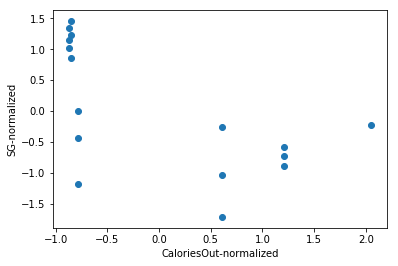

In [79]:



plt.scatter(calout_sg_df_norm[:,0], calout_sg_df_norm[:,1])

plt.xlabel("CaloriesOut-normalized")

plt.ylabel("SG-normalized")
plt.show()




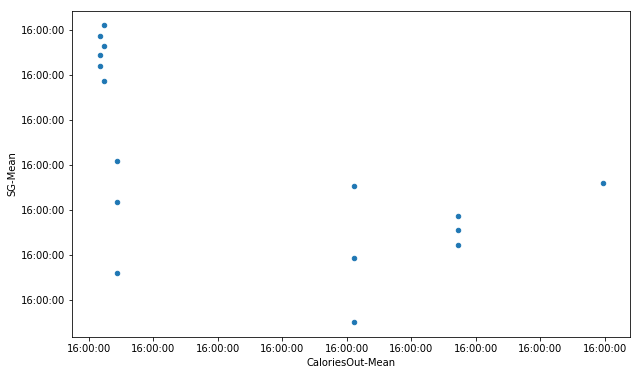

In [141]:

pandas.tslib.Timestamp


calout_sg_df['Time'] = calout_sg_df.Time.astype(np.int64)
calout_sg_df['Time'] = calout_sg_df.Time.astype(np.int64)

# calout_sg_df['CaloriesOut-Mean'] = calout_sg_df.Time.astype(np.int64)
# calout_sg_df['SG-Mean'] = calout_sg_df.Time.astype(np.int64)

fig, ax = plt.subplots(figsize=(10,6))
calout_sg_df.plot(x='CaloriesOut-Mean', y='SG-Mean', kind='scatter', ax=ax)
ax.set_xticklabels([datetime.fromtimestamp(ts / 1e9).strftime('%H:%M:%S') for ts in ax.get_xticks()])
ax.set_yticklabels([datetime.fromtimestamp(ts / 1e9).strftime('%H:%M:%S') for ts in ax.get_yticks()])
plt.show()

In [157]:
type(calout_sg_df.Time[0])

pandas._libs.tslib.Timestamp

In [73]:
# plt.scatter(calout_sg_df_norm[:,0], calout_sg_df_norm[:,1])
# plt.show()


calout_sg_df_norm.plot(figsize=(16, 6), style='o')
plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'plot'

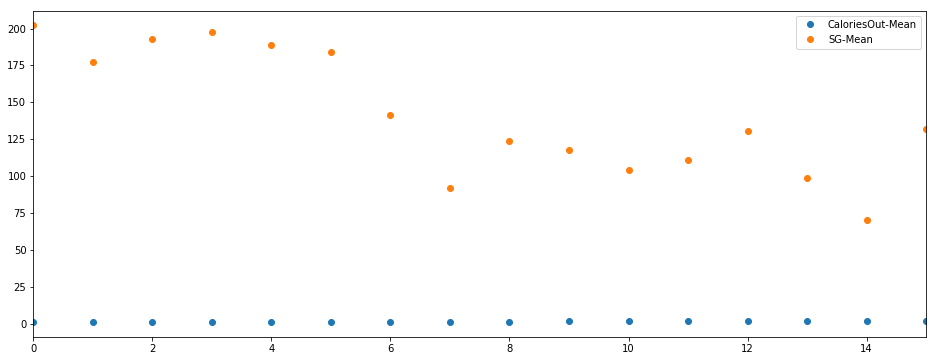

In [158]:
calout_sg_df.plot(figsize=(16, 6), style='o')
plt.show()


In [214]:

calout_sg_df = pd.DataFrame()
cal_sg_list = []
for item in final_CalOut_df['CaloriesOut-Mean']:
    cal_sg_list.append(item)

calout_sg_df['CaloriesOut-Mean'] = cal_sg_list

calout_sg_df['SG-Mean'] = sg_split_df['SG-Mean']
calout_sg_df['Time'] = sg_split_df['SG-Time']

calout_sg_df



calout_sg_df['Time'] = pd.to_datetime(calout_sg_df['Time'])
calout_sg_df.index = calout_sg_df['Time']
time_index_calout_sg_df = calout_sg_df
del time_index_calout_sg_df['Time']



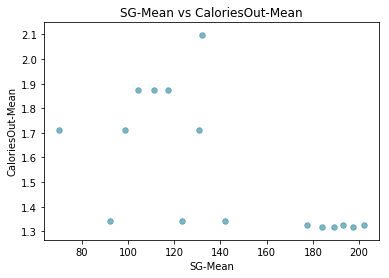

In [217]:
def scatterplot(x_data, y_data, x_label, y_label, title):

    # Create the plot object
    _, ax = plt.subplots()

    # Plot the data, set the size (s), color and transparency (alpha)
    # of the points
    ax.scatter(x_data, y_data, s = 30, color = '#539caf', alpha = 0.75)

    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

# Call the function to create plot
scatterplot(x_data = time_index_calout_sg_df['SG-Mean']
            , y_data = time_index_calout_sg_df['CaloriesOut-Mean']
            , x_label = 'SG-Mean'
            , y_label = 'CaloriesOut-Mean'
            , title = 'SG-Mean vs CaloriesOut-Mean')
plt.show()

# list of days that have records for cal out and SG - glucose 
{'2017-6-5', '2017-6-7', '2017-8-15', '2017-6-3', '2017-6-9', '2017-6-25', '2017-8-6', '2017-8-13', '2017-6-17', '2017-6-13', '2017-6-27', '2017-7-5', '2017-6-10', '2017-8-18', '2017-6-30', '2017-6-1', '2017-6-26', '2017-6-22', '2017-8-14', '2017-6-11', '2017-8-7', '2017-6-2', '2017-8-9', '2017-7-4', '2017-7-18', '2017-7-1', '2017-8-2', '2017-8-12', '2017-5-30', '2017-5-31', '2017-7-2', '2017-6-8', '2017-6-12', '2017-6-21', '2017-8-3', '2017-6-15', '2017-8-5', '2017-6-18', '2017-5-29', '2017-6-14', '2017-6-19', '2017-8-11', '2017-8-17', '2017-6-20', '2017-6-6', '2017-5-27', '2017-6-4', '2017-6-23', '2017-5-28', '2017-6-28', '2017-6-29', '2017-6-16', '2017-7-3', '2017-8-1', '2017-8-8', '2017-7-19', '2017-7-6', '2017-8-4', '2017-8-10', '2017-6-24', '2017-8-16'}
